In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler

In [2]:
# Daten einlesen
data = pd.read_csv('D:/Sensorprobe/version_3/model.ipynb')

In [3]:
data.head()

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6,class,activity
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656,1,drilling
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280,1,drilling
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125,1,drilling
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153,1,drilling
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859,1,drilling


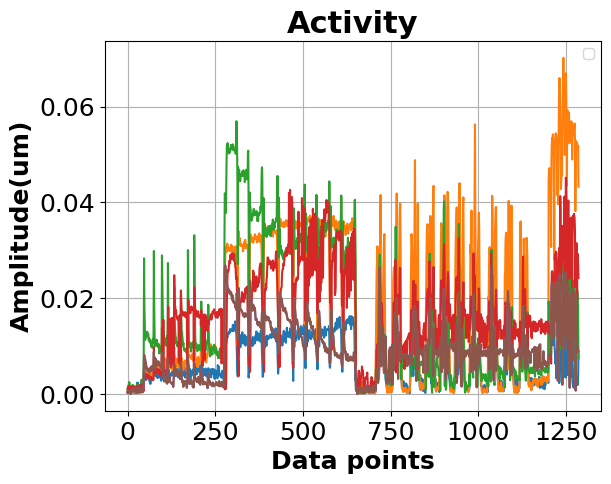

In [4]:

plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(['R1_1'])

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(data.index, data[['R1_1','R1_2', 'R1_3', 'R1_4', 'R1_5', 'R1_5']])

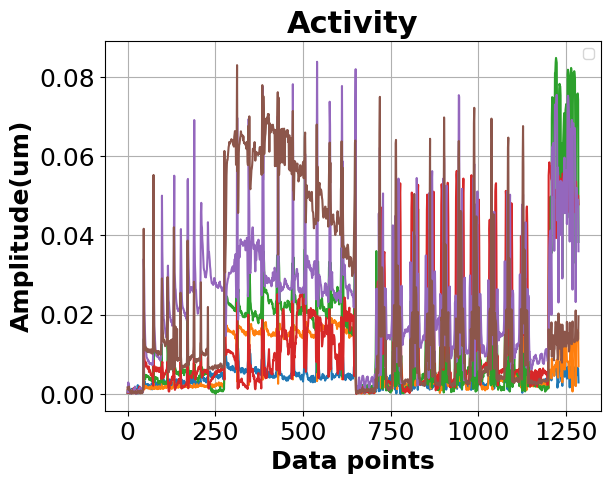

In [5]:
plt.title('Activity', fontsize=22, fontweight='bold')
plt.xlabel('Data points', fontsize=18, fontweight='bold')
plt.ylabel('Amplitude(um)', fontsize=18, fontweight='bold')
plt.grid(True)
plt.legend(['R1_1'])

# Set the text size of the tick labels on both axes
plt.tick_params(axis='both', labelsize=18)
plt.plot(data.index, data[['R4_1','R4_2', 'R4_3', 'R4_4', 'R4_5', 'R4_6', ]])

In [6]:
# Preprocessing
X = data.drop(['class', 'activity'], axis=1)
y = data['class']
y_encoded = to_categorical(y, num_classes=3)

In [7]:
X

,R1_1,R1_2,R1_3,R1_4,R1_5,R1_6,R3_1,R3_2,R3_3,R3_4,R3_5,R3_6,R4_1,R4_2,R4_3,R4_4,R4_5,R4_6
0,0.001111,0.000219,0.000439,0.000362,0.000342,0.000650,0.000268,0.000650,0.000537,0.000116,0.000094,0.000552,0.000920,0.001127,0.000246,0.000292,0.000431,0.001656
1,0.001377,0.001184,0.001193,0.000865,0.000210,0.001131,0.001096,0.000345,0.000496,0.000823,0.000070,0.000124,0.000499,0.000291,0.000759,0.000554,0.001224,0.001280
2,0.000603,0.001458,0.001701,0.001461,0.000691,0.001315,0.000762,0.000343,0.000061,0.000129,0.000610,0.000255,0.000404,0.000404,0.000598,0.001617,0.002922,0.001125
3,0.000647,0.001622,0.001138,0.001645,0.000174,0.000324,0.000486,0.000302,0.000255,0.000283,0.000259,0.000209,0.000935,0.000325,0.001138,0.000907,0.002185,0.001153
4,0.000496,0.002436,0.001304,0.001717,0.000259,0.001168,0.001910,0.000633,0.000451,0.000512,0.000406,0.000285,0.000265,0.000633,0.001719,0.000485,0.002365,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0.002355,0.052429,0.021900,0.019615,0.008719,0.025708,0.001679,0.036814,0.010039,0.012267,0.038336,0.015660,0.005676,0.015868,0.075322,0.049115,0.049892,0.013422
1282,0.002675,0.050883,0.021514,0.029315,0.009731,0.024833,0.001426,0.036614,0.010051,0.012238,0.037854,0.014972,0.006621,0.015862,0.075724,0.048439,0.048292,0.013557
1283,0.001917,0.050779,0.020723,0.028467,0.008986,0.026554,0.001766,0.037261,0.009739,0.012324,0.038147,0.014972,0.006314,0.016109,0.075825,0.049617,0.047263,0.013606
1284,0.003551,0.051887,0.016771,0.027311,0.009095,0.028740,0.001465,0.037348,0.008689,0.011817,0.037240,0.016257,0.006390,0.015510,0.074210,0.050072,0.048995,0.013861


In [8]:
# Feature Scaling (empfohlen für LSTM-Modelle)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [10]:
# Überprüfe die Form der Eingabedaten
print("Shape von X_train", X_train.shape)

Shape von X_train (900, 18)


In [11]:
print("Size of x:", len(X))
print("Size of y:", len(y))


Size of x: 1286
Size of y: 1286


In [12]:
print("X_train shape before reshaping:", X_train.shape)
print("X_test shape before reshaping:", X_test.shape)


X_train shape before reshaping: (900, 18)
X_test shape before reshaping: (386, 18)


In [13]:
# Define a learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1

In [14]:
# Build the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

In [15]:
# Compile the model with Adam optimizer and L2 regularization
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9728      
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [17]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

In [18]:
# Define a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [19]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint,lr_scheduler]
)

Epoch 1/300
15/15 [==============================] - 2s 33ms/step - loss: 0.4420 - accuracy: 0.8356 - val_loss: 0.6503 - val_accuracy: 0.8808 - lr: 0.0010
Epoch 2/300
15/15 [==============================] - 0s 12ms/step - loss: 0.1601 - accuracy: 0.9389 - val_loss: 0.5675 - val_accuracy: 0.9119 - lr: 0.0010
Epoch 3/300
15/15 [==============================] - 0s 11ms/step - loss: 0.1127 - accuracy: 0.9500 - val_loss: 0.4583 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 4/300
15/15 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9678 - val_loss: 0.3916 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 5/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0781 - accuracy: 0.9678 - val_loss: 0.3571 - val_accuracy: 0.9378 - lr: 0.0010
Epoch 6/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0734 - accuracy: 0.9756 - val_loss: 0.3067 - val_accuracy: 0.9585 - lr: 0.0010
Epoch 7/300
15/15 [==============================] - 0s 7ms/step - loss:

In [20]:
# Lade die besten Gewichtungen des Modells
model.load_weights('best_model.h5')

In [21]:
# Predict using the trained model
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [22]:
# Convert predicted probabilities to binary labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to binary labels
y_true_labels = np.argmax(y_test, axis=1)

In [23]:
total = 0  

output_lines = [
    f"Predicted Class: {pred}    True Class: {true}\n"
    for pred, true in zip(y_pred_labels, y_true_labels)
]

total = len(output_lines)

output = "\n".join(output_lines)
print(output)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_true_labels, y_pred_labels)

print("Total:", total)  
print("Accuracy:", accuracy)

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 2    True Class: 2

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 2    True Class: 2

Predicted Class: 1    True Class: 1

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 2    True Class: 2

Predicted Class: 0    True Class: 0

Predicted Class: 1    True Class: 1

Predicted Class: 1    True Class: 1

Predicted Class: 1    True Class: 1

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 1    True Class: 1

Predicted Class: 2    True Class: 2

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 0    True Class: 0

Predicted Class: 1    True Class: 1

Predicted Class: 0    True Class: 0

P

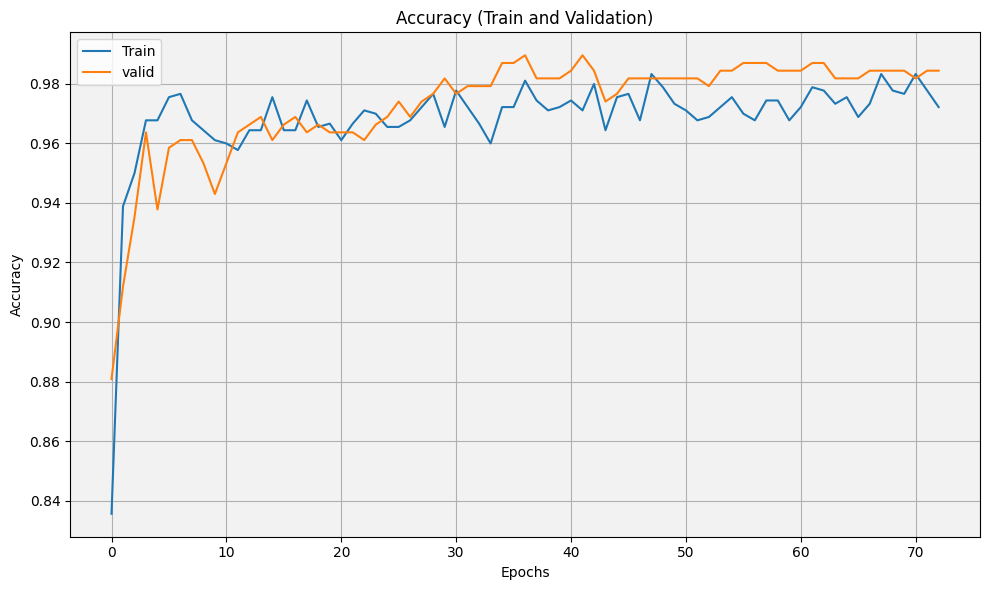

In [24]:

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='valid')

plt.title('Accuracy (Train and Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Hinzufügen einer Hintergrundfarbe
ax = plt.gca()
ax.set_facecolor((0.95, 0.95, 0.95))

plt.tight_layout()  # Verbessert die Ausrichtung der Beschriftungen
plt.show()
